**Table of contents**<a id='toc0_'></a>    
- [보험사 고객 데이터 분석](#toc1_)    
- [Imports](#toc2_)    
- [Functions & Variables](#toc3_)    
- [Data](#toc4_)    
- [Analysis](#toc5_)    
  - [Target Column(Response) 살펴보기](#toc5_1_)    
    - [87%가 관심이 없다는 응답](#toc5_1_1_)    
    - [관심있다고 응답한 고객 수 시각화](#toc5_1_2_)    
    - [관심 있다고 응답한 비율 시각화](#toc5_1_3_)    
  - [UnderSampling 기법 적용](#toc5_2_)    
    - [RandomUnderSampling](#toc5_2_1_)    
  - [Numerical Column 살펴보기](#toc5_3_)    
    - [numerical columns의 데이터 분포 시각화](#toc5_3_1_)    
    - [Annual_Premium 이상치 처리](#toc5_3_2_)    
      - [%의 이상치](#toc5_3_2_1_)    
      - [이상치 제거](#toc5_3_2_2_)    
      - [Annual_Premium 이상치 제거 후 데이터 분포 시각화](#toc5_3_2_3_)    
  - [Categorical Column 살펴보기](#toc5_4_)    
    - [categorical columns의 데이터 분포 시각화](#toc5_4_1_)    
  - [변수들과 보험 관심도 간의 상관관계](#toc5_5_)    
    - [상관관계 시각화](#toc5_5_1_)    
    - [상관관계 Top5 - Vehicle_Damage, Vehicle_Age, Previously_Insured, Policy_Sales_Channel, Age](#toc5_5_2_)    
  - [Vehicle_Damage에 따른 응답 분석](#toc5_6_)    
    - [Vehicle Damage에 따른 Response 응답 수 시각화](#toc5_6_1_)    
  - [Vehicle_Age에 따른 응답 분석](#toc5_7_)    
    - [bar plot](#toc5_7_1_)    
  - [Previously_Insured에 따른 응답 분석](#toc5_8_)    
    - [Previously Insured에 따른 Response 응답 수 시각화](#toc5_8_1_)    
  - [Annual_Premium에 따른 응답 분석](#toc5_9_)    
    - [Repsonse 응답에 따른 Annual Premium 값 분포 시각화](#toc5_9_1_)    
    - [Repsonse 응답에 따른 Annual Premium 값 경향 시각화](#toc5_9_2_)    
    - [Annual_Premium 10개 구간별 Response 응답 비율 시각화](#toc5_9_3_)    
  - [Policy_Sales_Channel에 따른 응답 분석](#toc5_10_)    
    - [Policy_Sales_Channel에 따른 Response 응답 비율 시각화](#toc5_10_1_)    
  - [Age에 따른 응답 분석](#toc5_11_)    
    - [Age에 따른 Response 응답 비율 시각화](#toc5_11_1_)    
  - [Policy_Sales_Channel과 Age 컬럼 구간 별 차등 점수 부여](#toc5_12_)    
    - [Policy_Sales_Channel 구간 별 응답 비율 histogram](#toc5_12_1_)    
    - [Age 구간 별 응답 비율 histogram](#toc5_12_2_)    
  - [상관관계 Top5 범주에 따른 Scores 부여 및 계산](#toc5_13_)    
  - [Score 기반 보험 관심 여부 예측](#toc5_14_)    
    - [Score 분포 시각화](#toc5_14_1_)    
    - [Score 신뢰성 검증](#toc5_14_2_)    
      - [그룹별 속한 고객 비율](#toc5_14_2_1_)    
      - [그룹별 Response 비율](#toc5_14_2_2_)    
      - [Score와 Response 상관계수](#toc5_14_2_3_)    
    - [Score 높은 그룹 세부 분석](#toc5_14_3_)    
      - [Score 높은 그룹 내의 추세 시각화](#toc5_14_3_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[보험사 고객 데이터 분석](#toc0_)

[Kaggle의 Health Insurance Cross Sell Prediction](https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction)에서 제공된 보험회사의 고객데이터를 분석하여 이 보험회사에서 새로운 자동차 보험을 출시했을 때 얼마나 관심을 보일지 예측하는 지표(Score)를 만든다. 

# <a id='toc2_'></a>[Imports](#toc0_)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# <a id='toc3_'></a>[Functions & Variables](#toc0_)

In [ ]:
gender_mapping = {'Female': 0, 'Male': 1}
driving_license_mapping = {'No': 0, 'Yes': 1}
previously_insured_mapping = {'No': 0, 'Yes': 1}
vehicle_age_mapping = {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}
vehicle_damage_mapping = {'No': 0, 'Yes': 1}

mappings = [gender_mapping, driving_license_mapping, previously_insured_mapping, vehicle_age_mapping, vehicle_damage_mapping]

In [50]:
def draw_distribution_and_box_plot(df, col):
    plt.figure(figsize=(12, 6))
    
    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, bins=30, kde=True, alpha=0.5) # kde: 모수 추정선
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')
    
    plt.tight_layout()
    plt.show()

In [71]:
def create_count_df(df, column1, column2):
    count_df = df.groupby([column1, column2])['id'].count().to_frame().rename(columns={'id': 'count'}).reset_index()
    return count_df

In [ ]:
def calculate_final_score(row):
    score_sum = 0
    for col in columns_for_score:
        score_sum += score_mapping[col][row[col]] * corr_weights[col]
    return score_sum

# <a id='toc4_'></a>[Data](#toc0_)

| Column Name            | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| id                     | 고객에 대한 고유 ID                                                 |
| Gender                 | 고객의 성별                                                  |
| Age                    | 고객의 나이                                                         |
| Driving License        | 운전면허가 있는지(0은 운전면허가 없음을, 1은 이미 운전면허가 있음을 의미) |
| Region Code            | 고객이 속한 지역의 고유 코드                                         |
| Previously Insured     | 자동차 보험에 이미 가입한 고객인지(0은 아직 가입하지 않은 것을, 1은 이미 가입한 것을 의미) |
| Vehicle Age            | 차량의 연식                                                  |
| Vehicle Damage         | 고객의 차량이 과거에 손상되었는지(0은 차량이 손상되지 않았음을, 1은 과거에 손상되었음을 의미) |
| Annual Premium         | 고객이 연간 보험료로 지불해야 할 금액                                |
| Policy Sales Channel   | 고객에게 연락하는데 사용되는 채널에 대한 익명화된 코드(에이전트를 통한것인지, 메일을 통한 것인지 등)                 |
| Vintage                | 고객이 회사와 연관된 기간(일 수)                                    |
| Response               | 자동차 보험에 관심이 있는지 여부(0은 관심이 없음을, 1은 관심이 있음을 의미) |


In [ ]:
train_path = './data/train.csv'
train_raw_df = pd.read_csv(train_path)

In [3]:
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


- object 타입인 데이터들 확인

In [ ]:
data_types = train_raw_df.dtypes
objects = []

for idx in train_raw_df.dtypes.index:
    data_type = data_types[idx]
    
    if data_type == 'object':
        objects.append(idx)
        print(idx)
        print(train_raw_df[idx].value_counts())
        print()

Gender
Gender
Male      206089
Female    175020
Name: count, dtype: int64

Vehicle_Age
Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

Vehicle_Damage
Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64



# <a id='toc5_'></a>[Analysis](#toc0_)

In [ ]:
train_df = train_raw_df.copy()

object 형 데이터들(여기선 범주형 데이터)들을 숫자로 매핑
1. Gender
2. Vehicle_Age
3. Vehicle_Damage

In [ ]:
train_df['Gender'] = train_df['Gender'].map(gender_mapping)
train_df['Vehicle_Age'] = train_df['Vehicle_Age'].map(vehicle_age_mapping)
train_df['Vehicle_Damage'] = train_df['Vehicle_Damage'].map(vehicle_damage_mapping)


In [14]:
display_object_values(train_df)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB


In [ ]:
display(train_df.head(1))
len(train_df)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1


381109

## <a id='toc5_1_'></a>[Target Column(Response) 살펴보기](#toc0_)

### <a id='toc5_1_1_'></a>[87%가 관심이 없다는 응답](#toc0_)

In [ ]:
train_df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

### <a id='toc5_1_2_'></a>[관심있다고 응답한 고객 수 시각화](#toc0_)

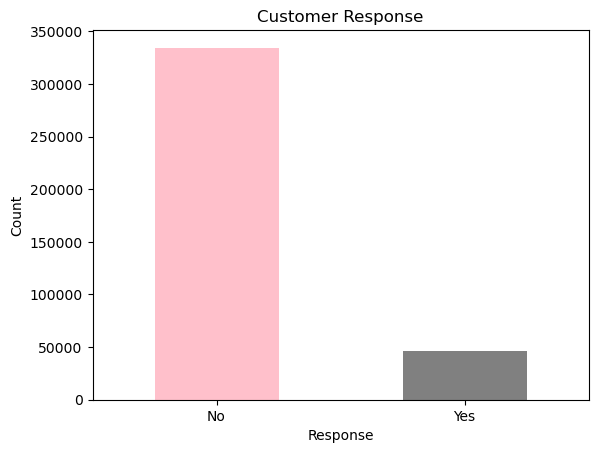

In [ ]:
train_df['Response'].value_counts().plot(kind='bar', color=['pink', 'grey'])
plt.title('Customer Response')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

- 전체 대비 비율 확인

In [ ]:
total = len(train_df['Response'])
percent = [val/total for val in train_df['Response'].value_counts()]

percent

[0.877436638861848, 0.12256336113815208]

### <a id='toc5_1_3_'></a>[관심 있다고 응답한 비율 시각화](#toc0_)

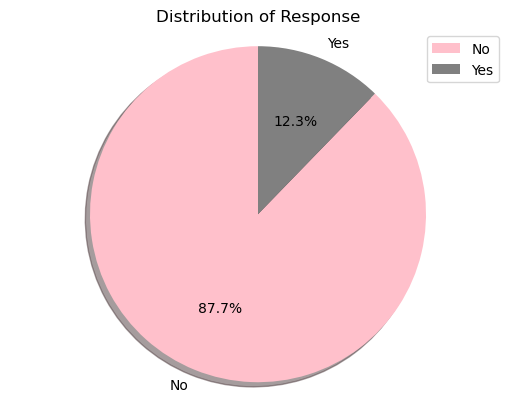

In [ ]:
labels = ['No', 'Yes']

plt.pie(percent, labels=labels, autopct='%.1f%%', startangle=90, shadow=True, colors=['pink', 'grey'])
plt.title('Distribution of Response')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()

데이터 불균형이 심하다. 

## <a id='toc5_2_'></a>[UnderSampling 기법 적용](#toc0_)

`undersampling`, `oversampling` 중 머신러닝 학습에서 데이터 표본은 크면 클수록 좋기 때문에 대부분 `oversampling`을 채택함<br>
하지만, 여기선 머신러닝을 사용하지 않고 'YES'로 응답한 사람이 12% 남짓이지만 데이터 수로는 4만 6천여개로 충분하다고 생각되어 간단한 `undersampling` 기법 채택

### <a id='toc5_2_1_'></a>[RandomUnderSampling](#toc0_)

In [ ]:
X = train_df.drop('Response', axis=1)
y = train_df['Response']

In [27]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [30]:
resampled_train_df = pd.concat([X_resampled, y_resampled], axis=1).reset_index(drop=True)

In [ ]:
# 샘플링 결과 출력
print('Origianl Class Distribution:')
print(train_df['Response'].value_counts())

print('\nResampled Class Distribution:')
print(resampled_train_df['Response'].value_counts())

Origianl Class Distribution:
Response
0    334399
1     46710
Name: count, dtype: int64

Resampled Class Distribution:
Response
0    46710
1    46710
Name: count, dtype: int64


## <a id='toc5_3_'></a>[Numerical Column 살펴보기](#toc0_)

In [ ]:
numerical_columns = ['Age', 'Region_Code', 'Annual_Premium', 'Vintage']

- 대부분의 평균과 중앙값이 비슷

In [ ]:
resampled_train_df[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,93420.000000,93420.000000,93420.000000,93420.000000
mean,40.819139,26.557878,30989.222265,154.683933
std,14.359740,12.641932,17695.332595,83.575008
min,20.000000,0.000000,2630.000000,10.000000
25%,27.000000,16.000000,24506.000000,82.000000
50%,41.000000,28.000000,32237.500000,155.000000
75%,50.000000,34.000000,40312.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


### <a id='toc5_3_1_'></a>[numerical columns의 데이터 분포 시각화](#toc0_)

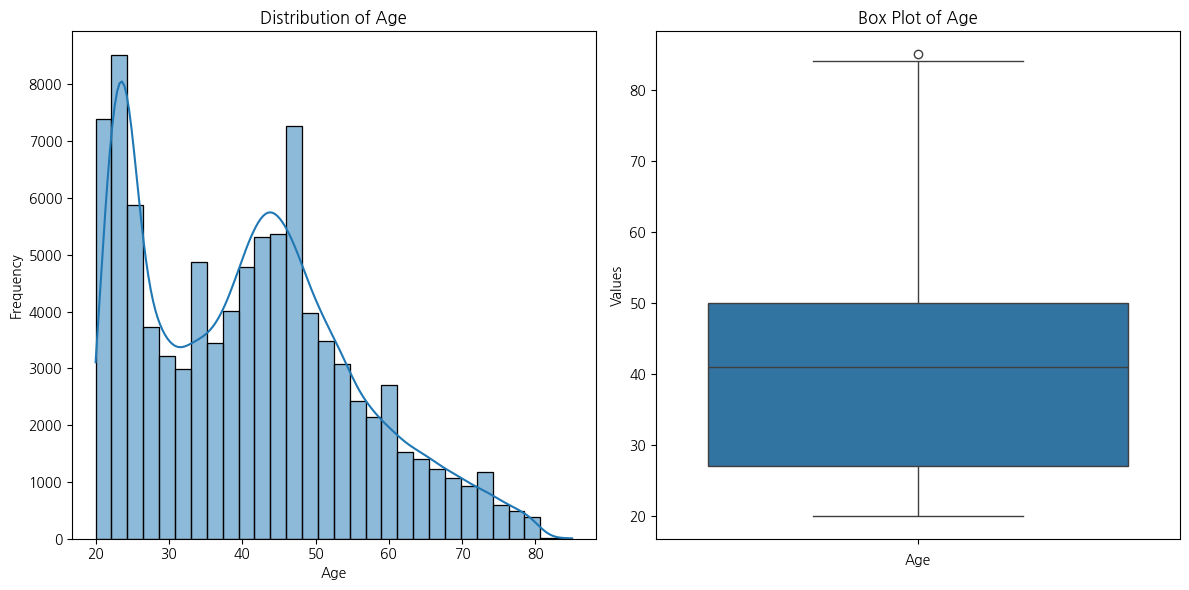

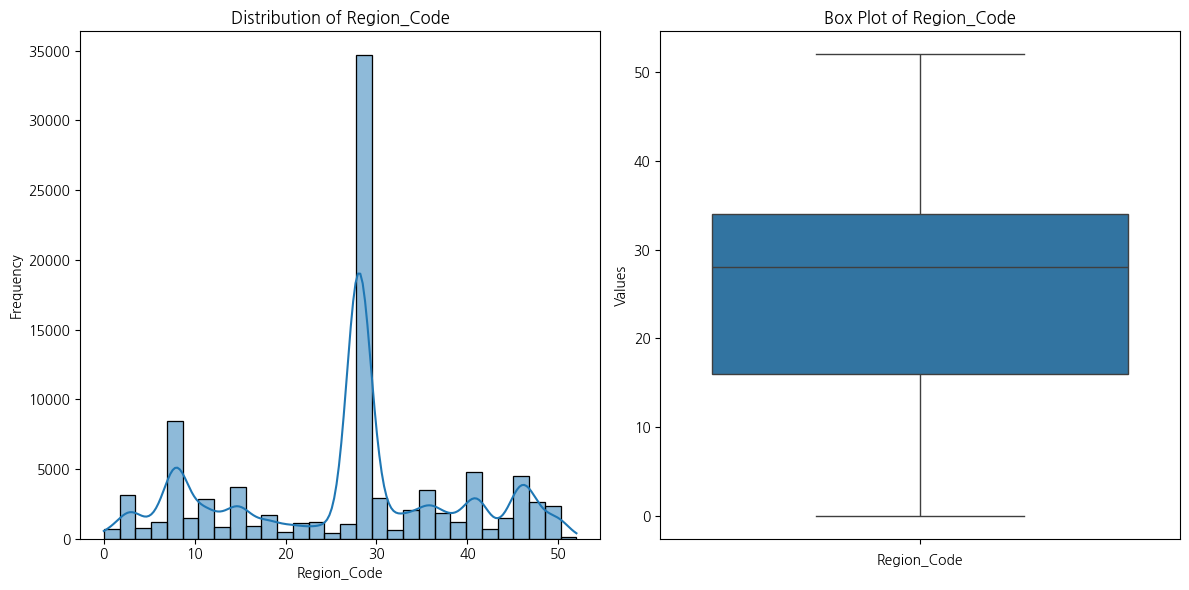

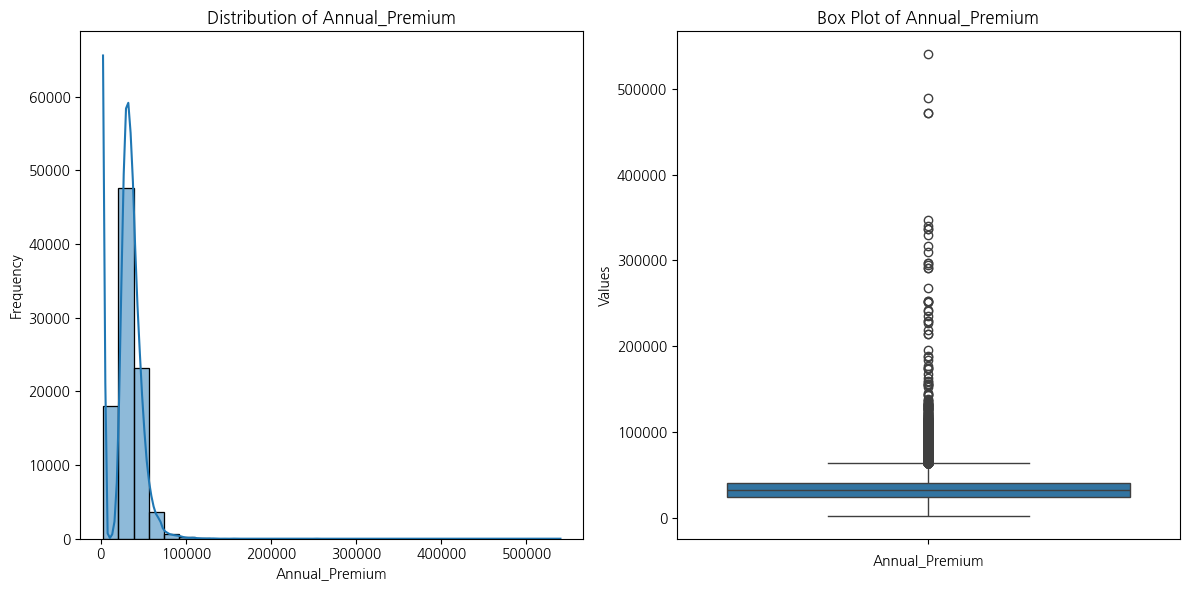

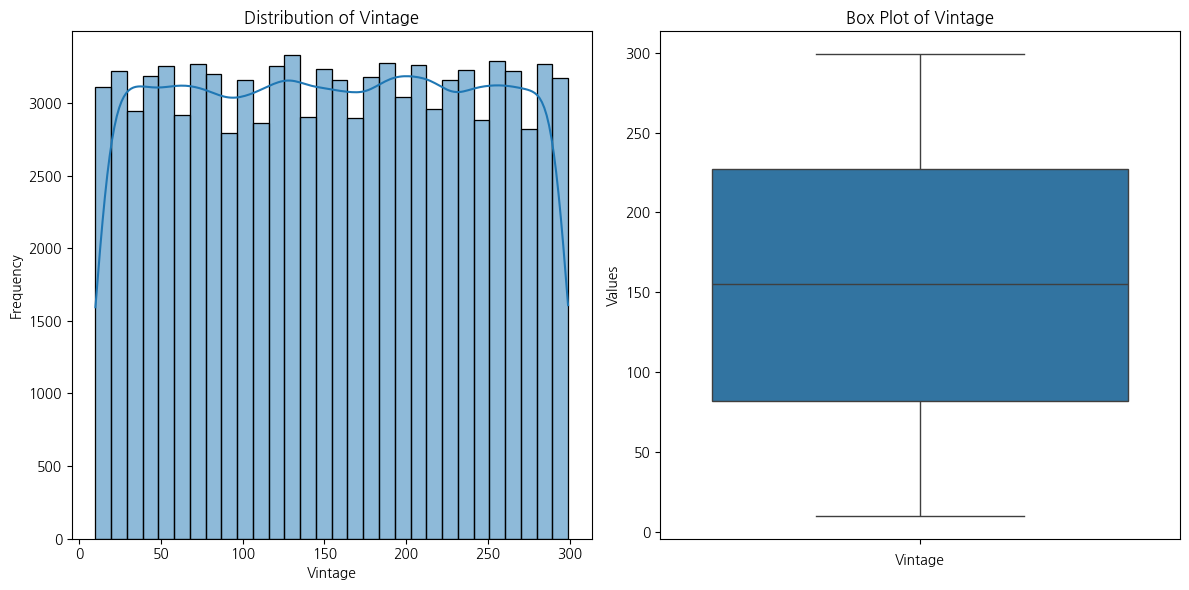

In [ ]:
for col in numerical_columns:
    draw_distribution_and_box_plot(resampled_train_df, col)
    

- 20대 초중반, 40대 후반, 50대 초반의 데이터가 많은 편
- 특정 지역에 고객들이 몰려있음 
- 연간 보험료는 이상치가 꽤 많음(데이터 분포를 제대로 파악하기 어려움)
- 가입일수의 데이터도 무난하게 분포된 편

### <a id='toc5_3_2_'></a>[Annual_Premium 이상치 처리](#toc0_)

boxplot에서는 <br>
IQR = |Q3 - Q1|
- \< Q1 - 1.5*IQR 
- \> Q3 + 1.5*IQR <br>

를 이상치라고 정의하는데, 이에 따라 이상치를 확인해본다. 

#### <a id='toc5_3_2_1_'></a>[%의 이상치](#toc0_)

In [ ]:
# 이상치 확인
q1 = resampled_train_df['Annual_Premium'].quantile(0.25)
q3 = resampled_train_df['Annual_Premium'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = resampled_train_df[(resampled_train_df['Annual_Premium'] < lower_bound) | (resampled_train_df['Annual_Premium'] > upper_bound)]

print('Annual_Premium 이상치 개수: ', len(outliers), f'({len(outliers)/len(resampled_train_df)*100:.2f}%)')

Annual_Premium 이상치 개수:  2294 (2.46%)


#### <a id='toc5_3_2_2_'></a>[이상치 제거](#toc0_)

In [ ]:
resampled_train_df = resampled_train_df[
    (resampled_train_df['Annual_Premium'] >= lower_bound) & 
    (resampled_train_df['Annual_Premium'] <= upper_bound)].reset_index(drop=True)


#### <a id='toc5_3_2_3_'></a>[Annual_Premium 이상치 제거 후 데이터 분포 시각화](#toc0_)

- 10000미만의 보험료를 내는 구간이 되게 크고, 그 이후로는 정규분포를 따름

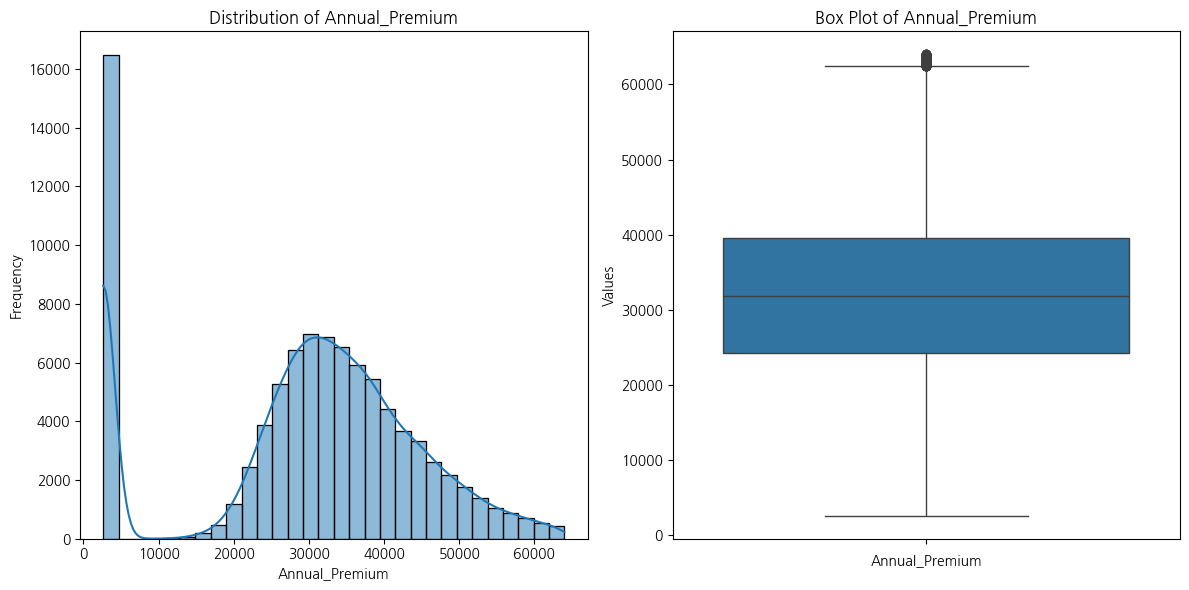

In [ ]:
draw_distribution_and_box_plot(resampled_train_df, 'Annual_Premium')

In [47]:
# 1만 미만 구간을 확인
ap_under_10000 = resampled_train_df[resampled_train_df['Annual_Premium'] < 10000]
total = len(ap_under_10000)

ap_under_10000['Response'].value_counts() / total * 100

Response
1    51.667375
0    48.332625
Name: count, dtype: float64

- 1만 미만의 보험료를 납부하는 고객들의 응답이 반반의 비율로, 연간 보험료는 자동차 보험 관심 여부와 상관이 없을 수도 있겠다. 

## <a id='toc5_4_'></a>[Categorical Column 살펴보기](#toc0_)

In [ ]:
categorical_columns = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']
resampled_train_df[categorical_columns].head(1)

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,0,1,1,0,0


### <a id='toc5_4_1_'></a>[categorical columns의 데이터 분포 시각화](#toc0_)

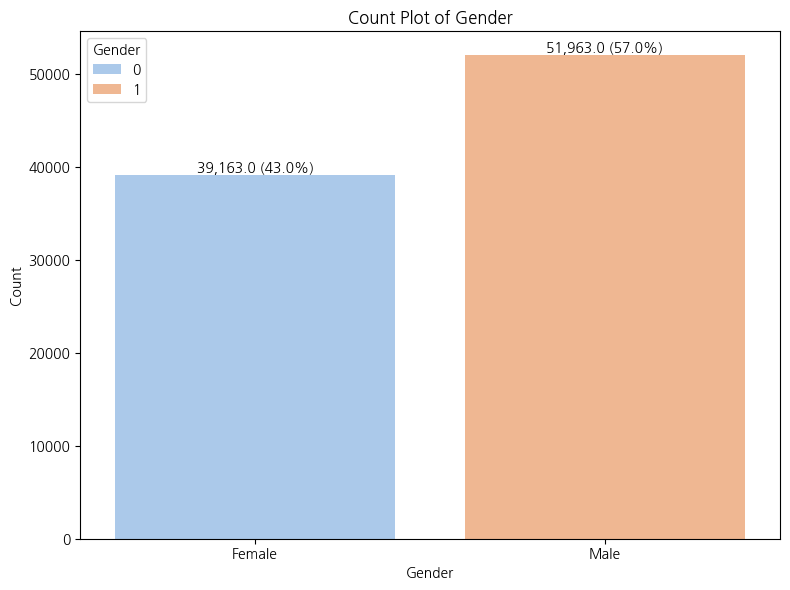

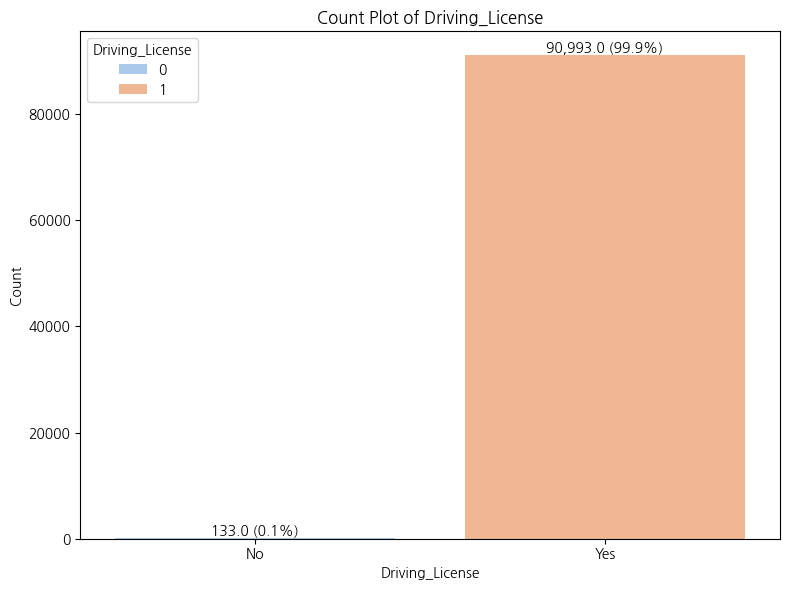

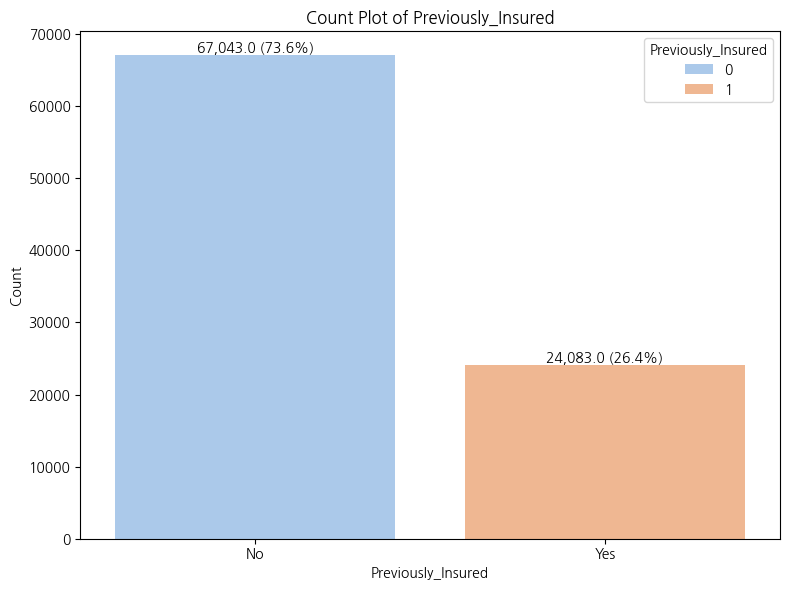

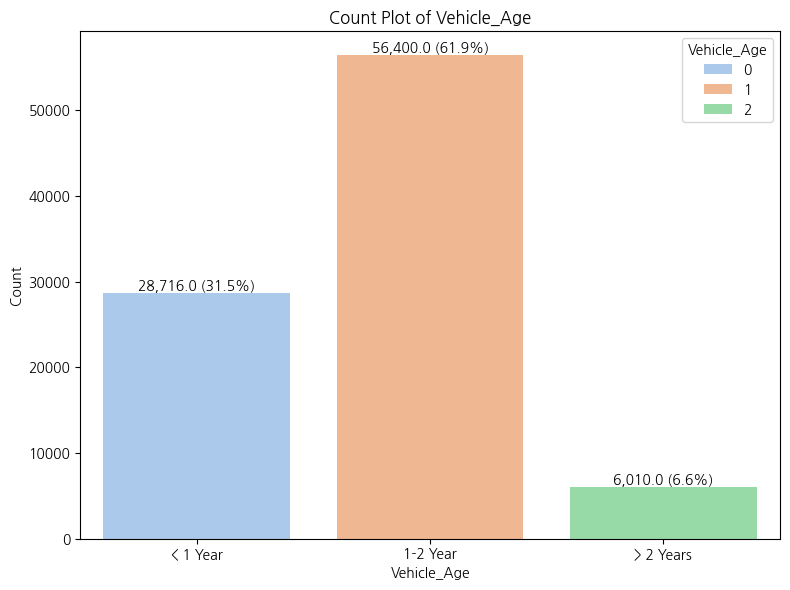

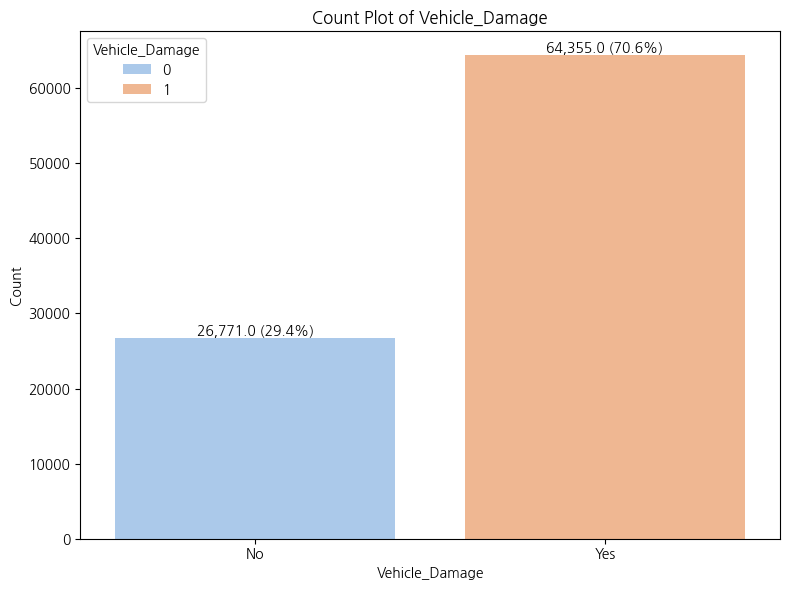

In [ ]:
for idx in range(len(categorical_columns)):
    col = categorical_columns[idx]
    mapping= mappings[idx]
    
    plt.figure(figsize=(8, 6))
    
    sns.countplot(data=resampled_train_df, x=col, palette='pastel', hue=col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(ticks=range(len(mapping)), labels=mapping.keys())
    
    # 카테고리별 비율 표시
    total = len(resampled_train_df)
    for p in plt.gca().patches:  # 현재 Axes 객체를 가져옴
        height = p.get_height() # 현재 루프를 돌고 있는 막대의 높이(카운트)
        if height > 0:
            plt.text(
                p.get_x() + p.get_width() / 2, height, # 텍스트를 중앙 정렬로 나타낼 좌표
                f'{height:,} ({height/total:.1%})',
                ha='center', va='bottom'
            )
        
    plt.tight_layout()
    plt.show()

- 여성(43%), 남성(57%)
- 운전면허소유(99.9%)
- 자동차 보험에 이미 가입이 되어있는(26.4%), 가입 x(73.6%)
- 차량 연식 - 1-2년(61.9%), 1년이하(31.5%)
- 차량사고경험 o(70%)

## <a id='toc5_5_'></a>[변수들과 보험 관심도 간의 상관관계](#toc0_)

In [ ]:
corr_matrix = resampled_train_df.corr()

### <a id='toc5_5_1_'></a>[상관관계 시각화](#toc0_)

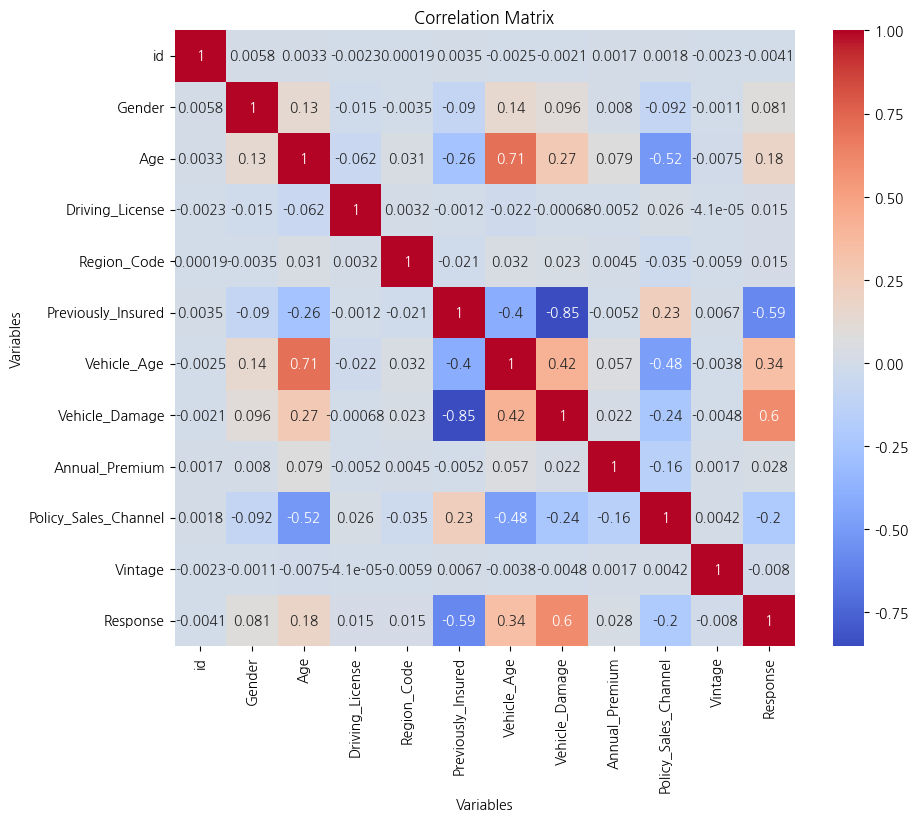

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

### <a id='toc5_5_2_'></a>[상관관계 Top5 - Vehicle_Damage, Vehicle_Age, Previously_Insured, Policy_Sales_Channel, Age](#toc0_)

- `Vehicle_Damage` 0.6
- `Vehicle_Age` 0.34
- `Previously_Insured` -0.59

In [69]:
print(corr_matrix['Response'].sort_values(ascending=False)[1:])

Vehicle_Damage          0.596266
Vehicle_Age             0.335929
Age                     0.181575
Gender                  0.080723
Annual_Premium          0.028373
Driving_License         0.014538
Region_Code             0.014525
id                     -0.004053
Vintage                -0.007969
Policy_Sales_Channel   -0.204969
Previously_Insured     -0.589715
Name: Response, dtype: float64


In [ ]:
print(corr_matrix['Response'].abs().sort_values(ascending=False)[1:])

Vehicle_Damage          0.596266
Previously_Insured      0.589715
Vehicle_Age             0.335929
Policy_Sales_Channel    0.204969
Age                     0.181575
Gender                  0.080723
Annual_Premium          0.028373
Driving_License         0.014538
Region_Code             0.014525
Vintage                 0.007969
id                      0.004053
Name: Response, dtype: float64


## <a id='toc5_6_'></a>[Vehicle_Damage에 따른 응답 분석](#toc0_)

In [ ]:
response_counts_by_damage = create_count_df(resampled_train_df, 'Vehicle_Damage', 'Response')
response_counts_by_damage

,Vehicle_Damage,Response,count
0,0,0,25803
1,0,1,968
2,1,0,19906
3,1,1,44449


### <a id='toc5_6_1_'></a>[Vehicle Damage에 따른 Response 응답 수 시각화](#toc0_)

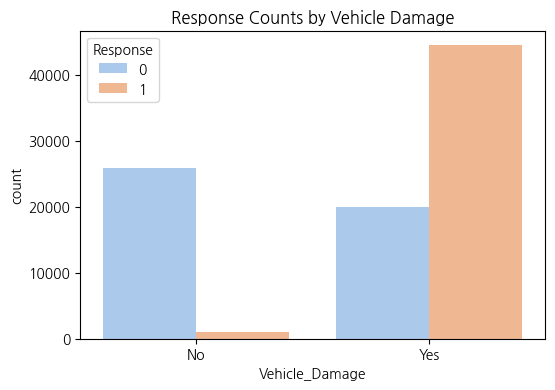

In [ ]:
plt.figure(figsize=(6, 4))

sns.barplot(
    x='Vehicle_Damage', y='count', hue='Response',
    data=response_counts_by_damage, palette='pastel'
)

x_labels = vehicle_damage_mapping.keys()

plt.xticks(ticks=[0, 1], labels=x_labels)
plt.title('Response Counts by Vehicle Damage')
plt.show()

차량 사고 경험이 있으면 자동차 보험에 관심이 있는편

## <a id='toc5_7_'></a>[Vehicle_Age에 따른 응답 분석](#toc0_)

In [ ]:
response_counts_by_age = create_count_df(resampled_train_df, 'Vehicle_Age', 'Response')
response_counts_by_age

,Vehicle_Age,Response,count
0,0,0,21630
1,0,1,7086
2,1,0,22483
3,1,1,33917
4,2,0,1596
5,2,1,4414


### <a id='toc5_7_1_'></a>[bar plot](#toc0_)

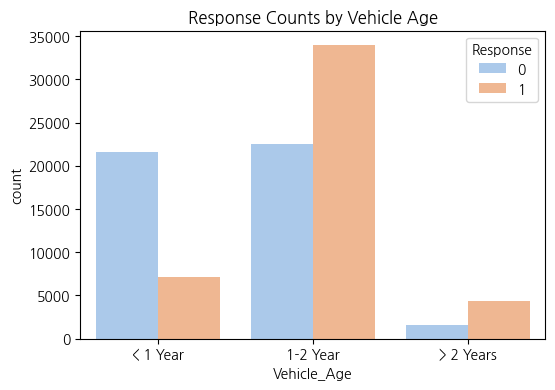

In [ ]:
plt.figure(figsize=(6, 4))

sns.barplot(
    x='Vehicle_Age', y='count', hue='Response',
    data=response_counts_by_age, palette='pastel'
)

x_labels = vehicle_age_mapping.keys()

plt.xticks(ticks=[0, 1, 2], labels=x_labels)
plt.title('Response Counts by Vehicle Age')
plt.show()

차량 연식이 1년이하인 경우는 차량 보험에 관심이 없는 편

## <a id='toc5_8_'></a>[Previously_Insured에 따른 응답 분석](#toc0_)

In [ ]:
response_counts_by_insured = create_count_df(resampled_train_df, 'Previously_Insured', 'Response')
response_counts_by_insured

,Previously_Insured,Response,count
0,0,0,21781
1,0,1,45262
2,1,0,23928
3,1,1,155


### <a id='toc5_8_1_'></a>[Previously Insured에 따른 Response 응답 수 시각화](#toc0_)

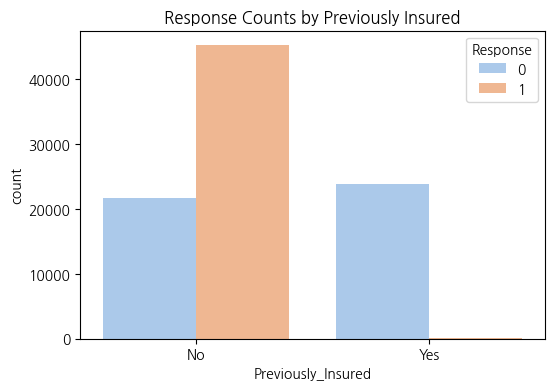

In [ ]:
plt.figure(figsize=(6, 4))

sns.barplot(
    x='Previously_Insured', y='count', hue='Response',
    data=response_counts_by_insured, palette='pastel'
)

x_labels = previously_insured_mapping.keys()

plt.xticks(ticks=[0, 1], labels=x_labels)
plt.title('Response Counts by Previously Insured')
plt.show()

이미 보험이 있는 경우에는, 압도적으로 보험에 관심이 없다고 응답

## <a id='toc5_9_'></a>[Annual_Premium에 따른 응답 분석](#toc0_)
- 아까 50:50 비율을 확인했어서 추가로 확인해본다.

### <a id='toc5_9_1_'></a>[Repsonse 응답에 따른 Annual Premium 값 분포 시각화](#toc0_)

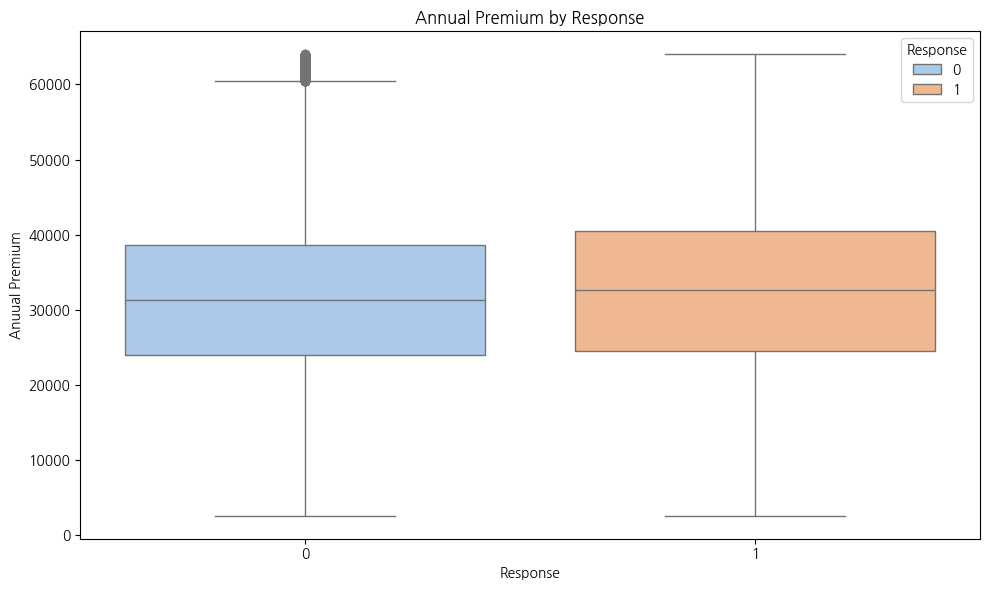

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=resampled_train_df, 
            x='Response', 
            y='Annual_Premium', 
            palette='pastel',
            hue='Response')

plt.title('Annual Premium by Response')
plt.xlabel('Response')
plt.ylabel('Anuual Premium')

plt.tight_layout()
plt.show()

역시 보험료를 얼마나 내느냐가 새로운 차량 보험에 관심과 연관이 없어보임

### <a id='toc5_9_2_'></a>[Repsonse 응답에 따른 Annual Premium 값 경향 시각화](#toc0_)

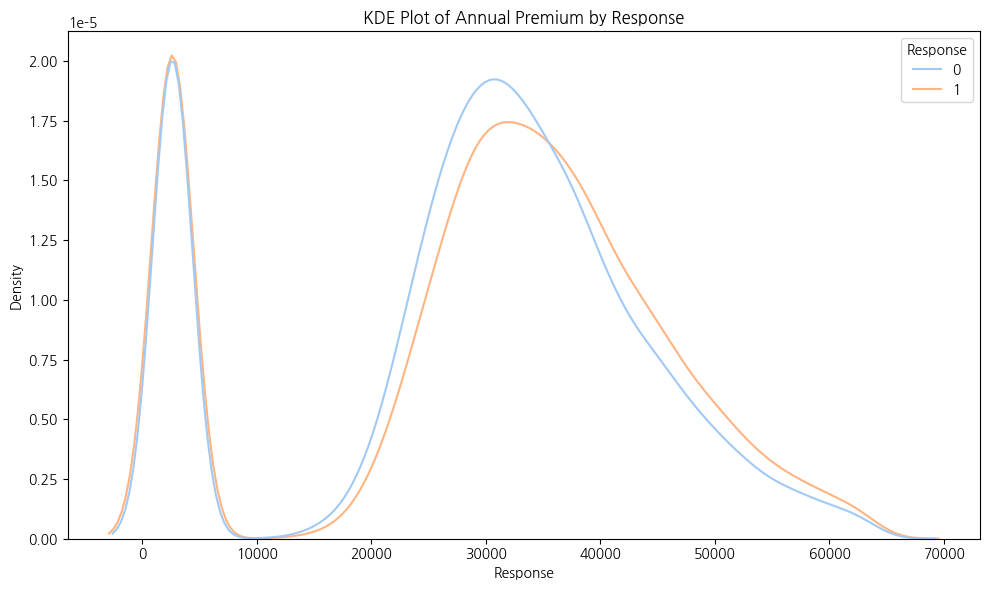

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=resampled_train_df, 
            x='Annual_Premium', 
            palette='pastel',
            hue='Response')

plt.title('KDE Plot of Annual Premium by Response')
plt.xlabel('Response')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

### <a id='toc5_9_3_'></a>[Annual_Premium 10개 구간별 Response 응답 비율 시각화](#toc0_)

In [ ]:
# 연간 지불 금액을 Quantile 기반의 구간화를 통해 시도
resampled_train_df['Premium_Group'] = pd.qcut(resampled_train_df['Annual_Premium'], q=10, duplicates='drop')

# 구간별로 Response 평균 계산
premium_response_avg = resampled_train_df.groupby('Premium_Group')['Response'].mean().reset_index()
premium_response_avg

,Premium_Group,Response
0,"(2629.999, 20846.0]",0.503813
1,"(20846.0, 26207.0]",0.428336
2,"(26207.0, 29235.0]",0.459394
3,"(29235.0, 31899.0]",0.472408
4,"(31899.0, 34693.0]",0.485401
5,"(34693.0, 37767.0]",0.502688
6,"(37767.0, 41652.0]",0.527113
7,"(41652.0, 47475.0]",0.545764
8,"(47475.0, 64004.0]",0.555251


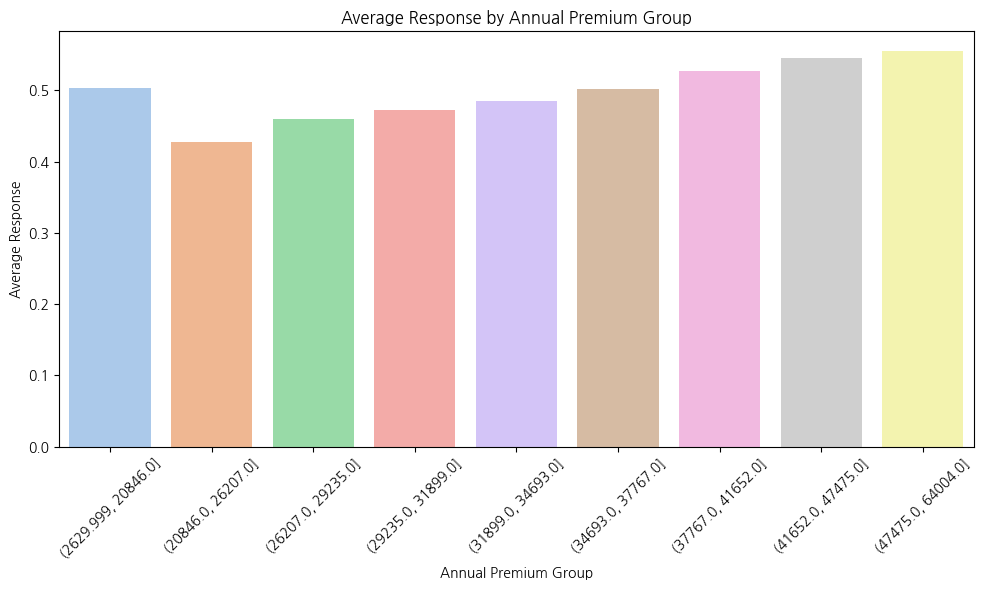

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(data=premium_response_avg, 
            x='Premium_Group', 
            y='Response', 
            palette='pastel',
            hue='Premium_Group')

plt.title('Average Response by Annual Premium Group')
plt.xlabel('Annual Premium Group')
plt.ylabel('Average Response')
plt.legend().set_visible(False)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 첫번째 구간을 제외하고는 구간별로 우상향하는 양상
- 그래도 전반적으로 응답한 비율이 0.5 전후이므로 Annual_Premium과 Response은 연관이 없어보임

## <a id='toc5_10_'></a>[Policy_Sales_Channel에 따른 응답 분석](#toc0_)

In [ ]:
resampled_train_df['Policy_Sales_Channel'].unique()

array([152., 124., 122.,  60.,  26.,  15.,   4., 160., 151.,  25., 139.,
       154., 150.,  14.,  55., 157.,   8.,  24., 135., 156.,  29.,  11.,
        12.,   7., 125., 109., 128., 155., 107., 159., 163.,  13.,   9.,
       158.,  61., 131., 136.,  16.,  69.,   1.,   3.,  52.,  18., 147.,
       106.,  37., 120., 114., 148.,  21., 118., 153.,  30., 132.,  22.,
        31.,  40., 111.,  19.,  64., 116.,  92., 127., 140.,  23.,  10.,
        44.,  35.,  59., 130., 103., 145.,  54.,  56.,  36., 134.,  73.,
       146., 113.,  42.,  95.,  38., 138.,  88.,  63., 119.,  47.,  49.,
        32.,  20., 121.,  91.,  48.,  80.,  51., 108.,  94.,  97.,  89.,
        65.,  66.,  45.,  98., 133., 126.,  87.,  71., 143., 129.,  86.,
        50.,  96.,  46., 101.,  78., 115.,  27.,  90.,  58.,  93.,  81.,
        39., 123.,  28.,  53.,  62., 110.,  68.,  43.,  17., 100.,   2.,
        57.])

In [ ]:
response_rate_by_channel = resampled_train_df.groupby('Policy_Sales_Channel')['Response'].mean().reset_index()
response_rate_by_channel

,Policy_Sales_Channel,Response
0,1.0,0.196629
1,2.0,1.000000
2,3.0,0.743590
3,4.0,0.606250
4,7.0,0.502793
...,...,...
128,157.0,0.722447
129,158.0,0.737705
130,159.0,0.166667
131,160.0,0.137609


### <a id='toc5_10_1_'></a>[Policy_Sales_Channel에 따른 Response 응답 비율 시각화](#toc0_)

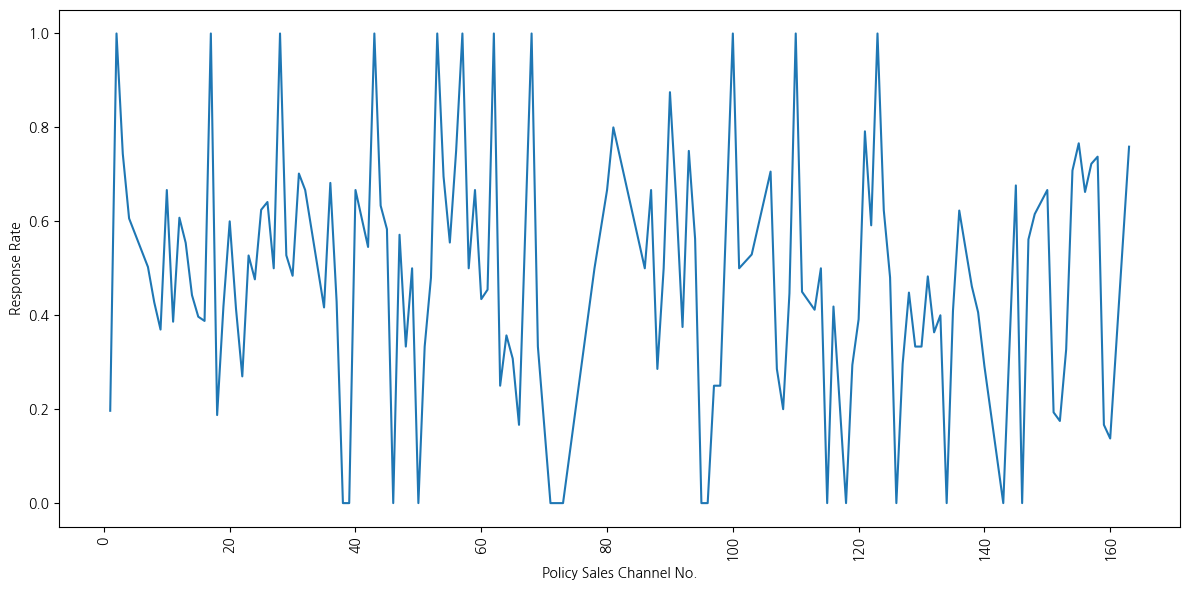

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=response_rate_by_channel, x='Policy_Sales_Channel', y='Response')
plt.xlabel('Policy Sales Channel No.')
plt.ylabel('Response Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

`Policy_Sales_Channel` 컬럼과 `Response` 컬럼과는 음의 상관관계를 갖기 때문에 `Policy_Sales_Channel`이 커질수록 관심이 있다고 응답한 비율이 적어져야 하는데, 그런 추세를 찾아볼 수 없음

## <a id='toc5_11_'></a>[Age에 따른 응답 분석](#toc0_)

In [ ]:
response_rate_by_age = resampled_train_df.groupby('Age')['Response'].mean().reset_index()
response_rate_by_age

,Age,Response
0,20,0.168307
1,21,0.204398
2,22,0.214061
3,23,0.217520
4,24,0.209146
...,...,...
61,81,0.444444
62,82,0.250000
63,83,0.142857
64,84,0.000000


### <a id='toc5_11_1_'></a>[Age에 따른 Response 응답 비율 시각화](#toc0_)

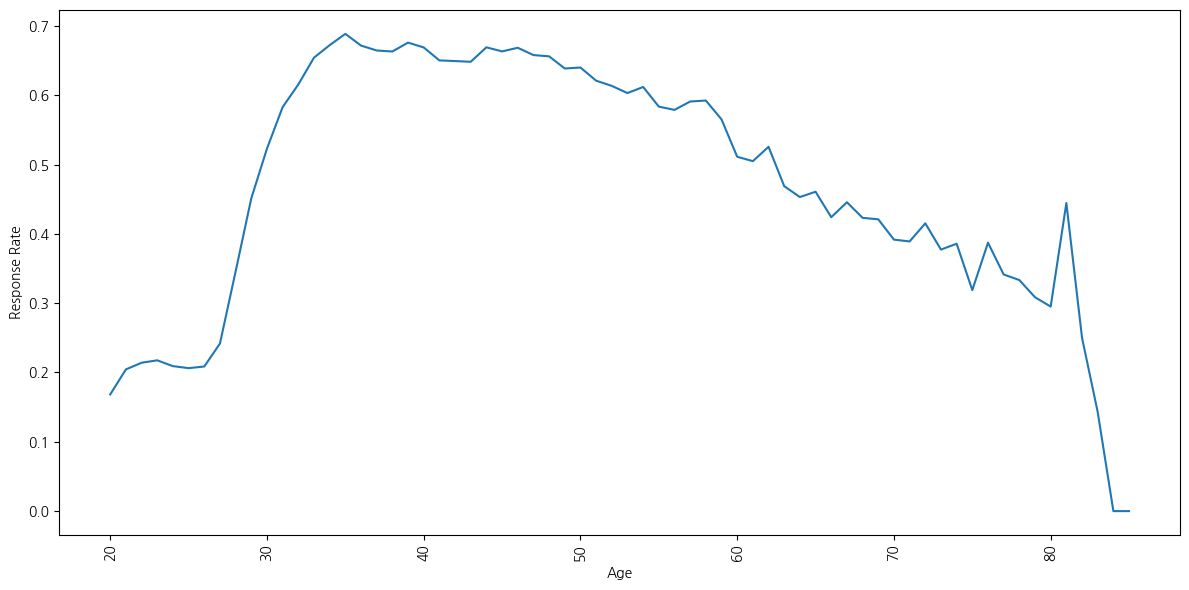

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=response_rate_by_age, x='Age', y='Response')
plt.xlabel('Age')
plt.ylabel('Response Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

`Age` 컬럼과 `Response` 컬럼과는 양의 상관관계를 갖기 때문에 `Age`가 커질수록 관심이 있다고 응답한 비율이 커져야 하는데, 그런 추세를 찾아볼 수 없음

## <a id='toc5_12_'></a>[Policy_Sales_Channel과 Age 컬럼 구간 별 차등 점수 부여](#toc0_)

두 컬럼의 전 구간이 모든 같은 경향성으로 `Response` 응답을 하는 것이 아니기도 하고 <br>
categorical data도 아니기 때문에 <br>
구간 별로 분류해서 차등 점수를 부여한다.  

In [ ]:
response_bins = [-0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
response_labels = [1, 2, 3, 4, 5]

In [108]:
response_rate_by_channel['Response_Bin'] = pd.cut(
    response_rate_by_channel['Response'],
    bins=response_bins,
    labels=response_labels
)
response_rate_by_channel

,Policy_Sales_Channel,Response,Response_Bin
0,1.0,0.196629,1
1,2.0,1.000000,5
2,3.0,0.743590,4
3,4.0,0.606250,4
4,7.0,0.502793,3
...,...,...,...
128,157.0,0.722447,4
129,158.0,0.737705,4
130,159.0,0.166667,1
131,160.0,0.137609,1


In [ ]:
response_rate_by_age['Response_Bin'] = pd.cut(
    response_rate_by_age['Response'],
    bins=response_bins,
    labels=response_labels
)
response_rate_by_age

,Age,Response,Response_Bin
0,20,0.168307,1
1,21,0.204398,2
2,22,0.214061,2
3,23,0.217520,2
4,24,0.209146,2
...,...,...,...
61,81,0.444444,3
62,82,0.250000,2
63,83,0.142857,1
64,84,0.000000,1


### <a id='toc5_12_1_'></a>[Policy_Sales_Channel 구간 별 응답 비율 histogram](#toc0_)

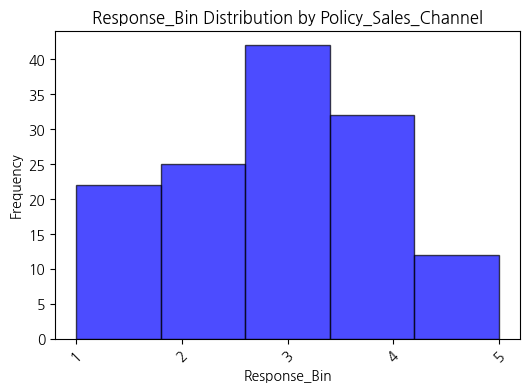

In [ ]:
plt.figure(figsize=(6, 4))

plt.hist(response_rate_by_channel['Response_Bin'], bins=len(response_labels), alpha=0.7, color='blue', edgecolor='black')
plt.title('Response_Bin Distribution by Policy_Sales_Channel')
plt.xlabel('Response_Bin')
plt.ylabel('Frequency')
plt.xticks(response_labels, rotation=45)
plt.show()

### <a id='toc5_12_2_'></a>[Age 구간 별 응답 비율 histogram](#toc0_)

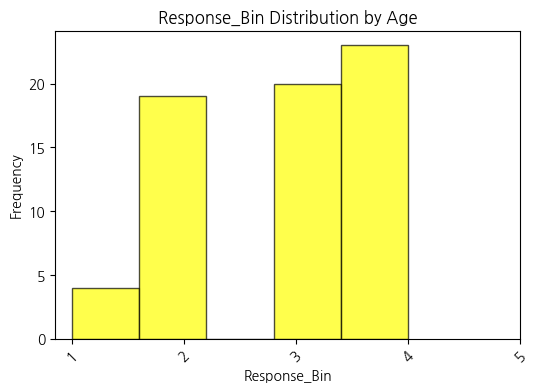

In [ ]:
plt.figure(figsize=(6, 4))

plt.hist(response_rate_by_age['Response_Bin'], bins=len(response_labels), alpha=0.7, color='yellow', edgecolor='black')
plt.title('Response_Bin Distribution by Age')
plt.xlabel('Response_Bin')
plt.ylabel('Frequency')
plt.xticks(response_labels, rotation=45)
plt.show()

In [117]:
# 각 특성별로 계산된 Response_Bin을 resampled_train_df에 추가
resampled_train_df['Response_Bin_Channel'] = pd.cut(
    resampled_train_df['Policy_Sales_Channel'].map(
        response_rate_by_channel.set_index('Policy_Sales_Channel')['Response']),
    bins=response_bins, labels=response_labels
)

resampled_train_df['Response_Bin_Age'] = pd.cut(
    resampled_train_df['Age'].map(
        response_rate_by_age.set_index('Age')['Response']),
    bins=response_bins, labels=response_labels
)

In [ ]:
display(resampled_train_df.head(1))
len(resampled_train_df)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Primium_Group,Premium_Group,Response_Bin_Channel,Response_Bin_Age
0,79510,0,22,1,19.0,1,0,0,54559.0,152.0,87,0,"(47475.0, 64004.0]","(47475.0, 64004.0]",1,2


91126

## <a id='toc5_13_'></a>[상관관계 Top5 범주에 따른 Scores 부여 및 계산](#toc0_)

상관관계 Top5 컬럼인 `차량 손상 경험`, `보험 가입 여부`, `차량 연식`, `채널`, `나이`에 각각 차등 점수를 부여했다. <br>
이 차등 점수와 `Response`와 각 컬럼과의 상관계수를 곱하여 scores 계산한다. 

|컬럼|차등 점수|상관계수|
|--|--|--|
|차량 손상 경험|A||A'|
|보험 가입 여부|B|B'|
|차량 연식|C|C'|
|채널|D|D'|
|나이|E|E'|

고객의 최종 scores = min-max scaling(AA' + BB' + CC' + DD' + EE')

In [126]:
columns_for_corr = corr_matrix['Response'].abs().sort_values(ascending=False)[1:6].index.to_list()
columns_for_corr

['Vehicle_Damage',
 'Previously_Insured',
 'Vehicle_Age',
 'Policy_Sales_Channel',
 'Age']

In [129]:
# 상관계수에 따른 가중치 설정
corr_weights = dict()

fcorr_weights_kv = [(col, corr_matrix['Response'][col]) for col in columns_for_corr]
for k, v in fcorr_weights_kv:
    corr_weights[k] = abs(v)
corr_weights

{'Vehicle_Damage': 0.5962662600297487,
 'Previously_Insured': 0.5897149446806905,
 'Vehicle_Age': 0.335928706474583,
 'Policy_Sales_Channel': 0.20496925714596706,
 'Age': 0.1815754926733999}

In [136]:
corr_weights['Response_Bin_Channel'] = corr_weights.pop('Policy_Sales_Channel')
corr_weights['Response_Bin_Age'] = corr_weights.pop('Age')
corr_weights

{'Vehicle_Damage': 0.5962662600297487,
 'Previously_Insured': 0.5897149446806905,
 'Vehicle_Age': 0.335928706474583,
 'Response_Bin_Channel': 0.20496925714596706,
 'Response_Bin_Age': 0.1815754926733999}

In [135]:
columns_for_score = corr_matrix['Response'].abs().sort_values(ascending=False)[1:4].index.to_list()
columns_for_score = columns_for_score + ['Response_Bin_Channel', 'Response_Bin_Age']
columns_for_score

['Vehicle_Damage',
 'Previously_Insured',
 'Vehicle_Age',
 'Response_Bin_Channel',
 'Response_Bin_Age']

In [140]:
score_threshold = 10

In [138]:
response_rate_by_vehicle_age = resampled_train_df.groupby('Vehicle_Age')['Response'].mean().reset_index()
response_rate_by_vehicle_age

,Vehicle_Age,Response
0,0,0.246761
1,1,0.601365
2,2,0.734443


In [148]:
vehicle_age_score_mapping = (response_rate_by_vehicle_age['Response'] * score_threshold).to_dict()
display(vehicle_age_score_mapping)

channel_score_mapping = (response_rate_by_channel.groupby('Response_Bin')['Response'].mean() * score_threshold).to_dict()
display(channel_score_mapping)

age_score_mapping = (response_rate_by_age.groupby('Response_Bin')['Response'].mean() * score_threshold).to_dict()
display(age_score_mapping)

{0: 2.4676138737985793, 1: 6.013652482269504, 2: 7.344425956738768}

{1: 0.646943366873336,
 2: 3.2812050782317415,
 3: 4.882119641284432,
 4: 6.855912311344757,
 5: 9.895833333333334}

{1: 0.7779105736782901,
 2: 2.9606982904324357,
 3: 4.982408354826708,
 4: 6.506174722201416,
 5: nan}

In [149]:
score_mapping = {
    'Vehicle_Damage': {0: score_threshold*-1, 1: score_threshold},
    'Previously_Insured': {0: score_threshold, 1: score_threshold*-1},
    'Vehicle_Age': vehicle_age_score_mapping,
    'Response_Bin_Channel': channel_score_mapping,
    'Response_Bin_Age': age_score_mapping
}

In [151]:
resampled_train_df['Score'] = 0

In [152]:
resampled_train_df['Score'] = resampled_train_df.apply(calculate_final_score, axis = 1)

In [153]:
resampled_train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Primium_Group,Premium_Group,Response_Bin_Channel,Response_Bin_Age,Score
0,79510,0,22,1,19.0,1,0,0,54559.0,152.0,87,0,"(47475.0, 64004.0]","(47475.0, 64004.0]",1,2,-10.360676
1,186555,1,57,1,18.0,0,1,1,33439.0,124.0,63,0,"(31899.0, 34693.0]","(31899.0, 34693.0]",4,3,16.189905
2,158037,0,64,1,28.0,0,1,1,39327.0,122.0,45,0,"(37767.0, 41652.0]","(37767.0, 41652.0]",3,3,15.785338
3,343706,1,52,1,41.0,1,1,0,26536.0,124.0,161,0,"(26207.0, 29235.0]","(26207.0, 29235.0]",4,4,-7.253040
4,137903,0,21,1,7.0,0,0,0,28416.0,152.0,92,0,"(26207.0, 29235.0]","(26207.0, 29235.0]",1,2,1.433623


In [ ]:
# min-max scaling
min_final_score = resampled_train_df['Score'].min()
max_final_score = resampled_train_df['Score'].max()

print(min_final_score, max_final_score)

resampled_train_df['Final_Score'] = (resampled_train_df['Score'] - min_final_score) / (max_final_score - min_final_score)
resampled_train_df.head()

-10.757016713405479 17.536719046326574


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Primium_Group,Premium_Group,Response_Bin_Channel,Response_Bin_Age,Score,Final_Score
0,79510,0,22,1,19.0,1,0,0,54559.0,152.0,87,0,"(47475.0, 64004.0]","(47475.0, 64004.0]",1,2,-10.360676,0.014008
1,186555,1,57,1,18.0,0,1,1,33439.0,124.0,63,0,"(31899.0, 34693.0]","(31899.0, 34693.0]",4,3,16.189905,0.952399
2,158037,0,64,1,28.0,0,1,1,39327.0,122.0,45,0,"(37767.0, 41652.0]","(37767.0, 41652.0]",3,3,15.785338,0.938100
3,343706,1,52,1,41.0,1,1,0,26536.0,124.0,161,0,"(26207.0, 29235.0]","(26207.0, 29235.0]",4,4,-7.253040,0.123843
4,137903,0,21,1,7.0,0,0,0,28416.0,152.0,92,0,"(26207.0, 29235.0]","(26207.0, 29235.0]",1,2,1.433623,0.430860


## <a id='toc5_14_'></a>[Score 기반 보험 관심 여부 예측](#toc0_)

### <a id='toc5_14_1_'></a>[Score 분포 시각화](#toc0_)

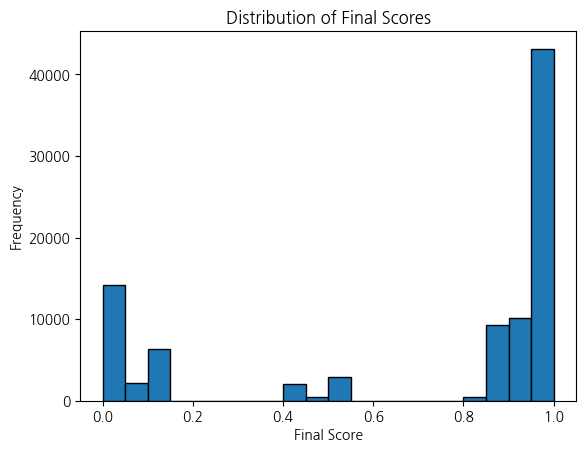

In [ ]:
plt.hist(resampled_train_df['Final_Score'], bins=20, edgecolor='black')
plt.xlabel('Final Score')
plt.ylabel('Frequency')
plt.title('Distribution of Final Scores')
plt.show()

- 뚜렷하게 세개의 그룹이 보임. 점수의 타당성을 증명하기 위해 그룹별 `Response` 비율을 확인한다. 

### <a id='toc5_14_2_'></a>[Score 신뢰성 검증](#toc0_)

- `group_three`로 갈수록 `Response` 비율이 1에 가깝다면 신뢰할 수 있음

In [ ]:
group_one = resampled_train_df[resampled_train_df['Final_Score'] <= 0.2]
group_two = resampled_train_df[(resampled_train_df['Final_Score'] >= 0.4) & (resampled_train_df['Final_Score'] <= 0.6)]
group_three = resampled_train_df[resampled_train_df['Final_Score'] >= 0.8]

#### <a id='toc5_14_2_1_'></a>[그룹별 속한 고객 비율](#toc0_)

In [ ]:
total = len(resampled_train_df)

print(f'{round(len(group_one)/total*100, 2)}%')
print(f'{round(len(group_two)/total*100, 2)}%')
print(f'{round(len(group_three)/total*100, 2)}%')

24.9%
6.0%
69.1%


#### <a id='toc5_14_2_2_'></a>[그룹별 Response 비율](#toc0_)

In [ ]:
print(f"{round(group_one['Response'].mean()*100, 2)}%")
print(f"{round(group_two['Response'].mean()*100, 2)}%")
print(f"{round(group_three['Response'].mean()*100, 2)}%")

0.31%
17.98%
70.46%


#### <a id='toc5_14_2_3_'></a>[Score와 Response 상관계수](#toc0_)

In [ ]:
resampled_train_df[['Response', 'Final_Score']].corr()

,Response,Final_Score
Response,1.000000,0.626154
Final_Score,0.626154,1.000000


### <a id='toc5_14_3_'></a>[Score 높은 그룹 세부 분석](#toc0_)

`group_three`를 5 그룹으로 나눠서 확인한다. 

In [ ]:
group_three_sorted = group_three.sort_values(by='Final_Score')

quantiles = np.linspace(0, 1, 6) # 5분위수 계산
score_quantiles = list(group_three_sorted['Final_Score'].quantile(quantiles))

print(score_quantiles)

[0.8383348277383295, 0.9251256945798445, 0.9523988629193118, 0.9621776574632616, 0.9621776574632616, 1.0]


In [181]:
response_means = []

for i in range(5):
    lower_bound = score_quantiles[i]
    upper_bound = score_quantiles[i + 1]
    
    subset = group_three_sorted[
        (group_three_sorted['Final_Score'] >= lower_bound) &
        (group_three_sorted['Final_Score'] <= upper_bound) 
    ]
    
    response_mean = subset['Response'].mean()
    response_means.append(response_mean)
    print(i, response_mean)

0 0.5603555832813475
1 0.6672004270082733
2 0.7562086855758342
3 0.7764499358584835
4 0.7737732267157568


상위 구간으로 갈수록 비율이 1에 가까워짐

#### <a id='toc5_14_3_1_'></a>[Score 높은 그룹 내의 추세 시각화](#toc0_)

In [ ]:
score_quantiles

[0.8383348277383295,
 0.9251256945798445,
 0.9523988629193118,
 0.9621776574632616,
 0.9621776574632616,
 1.0]

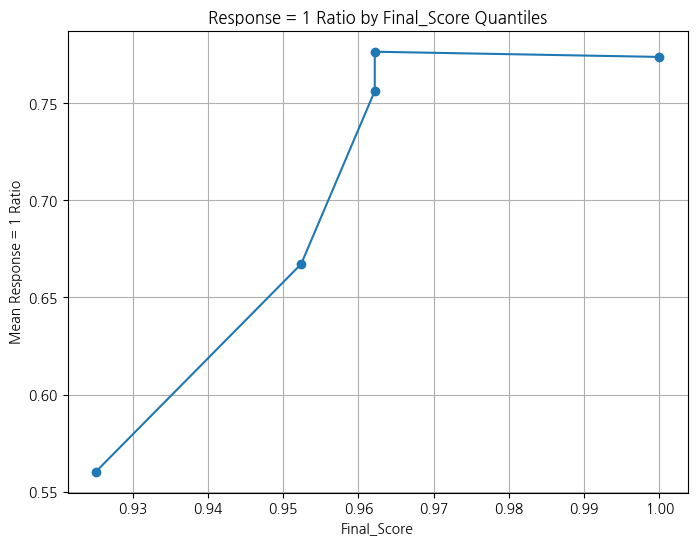

In [184]:
plt.figure(figsize=(8, 6))
plt.plot(score_quantiles[1:], response_means, marker='o')
plt.xlabel('Final_Score')
plt.ylabel('Mean Response = 1 Ratio')
plt.title('Response = 1 Ratio by Final_Score Quantiles')
plt.grid(True)
plt.show()